In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal
import ENDF6

In [2]:
import ENDF6el as endfel

f = endfel.fetch_elastic(filename='xn_data/si28_el.txt')
print(f([0.896,1.0,1.158,1.542]))

[2.88760675 4.67949255 1.60752601 2.46483739]


In [3]:
(en,al)=endfel.fetch_elastic_angular('xn_data/n-014_Si_028.endf')

In [4]:
dsdomeg=endfel.fetch_diff_xn(En=0.04e6)
dsdomegv=np.vectorize(dsdomeg)

dsdomeg1=endfel.fetch_diff_xn(En=0.896e6)
dsdomeg1v=np.vectorize(dsdomeg1)

dsdomeg2=endfel.fetch_diff_xn(En=1.158e6)
dsdomeg2v=np.vectorize(dsdomeg2)

dsdomeg3=endfel.fetch_diff_xn(En=1.542e6)
dsdomeg3v=np.vectorize(dsdomeg3)

dsdomeg4=endfel.fetch_diff_xn(En=1e6)
dsdomeg4v=np.vectorize(dsdomeg4)

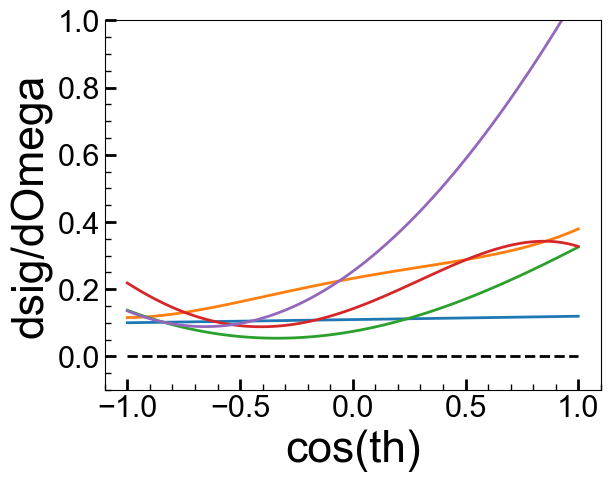

In [19]:
#plot quick
from pylab import *
ct = np.linspace(-1.0,1.0,100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(ct, dsdomegv(ct))
plot(ct, dsdomeg1v(ct))
plot(ct, dsdomeg2v(ct))
plot(ct, dsdomeg3v(ct))
plot(ct, dsdomeg4v(ct))
ax1.hlines(0,-1,1,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(-0.1,1.0)
xlabel('cos(th)')
ylabel('dsig/dOmega')
show()

In [7]:
import scipy.constants as co

mnbar = 931.494045;
m_n = co.physical_constants['neutron mass energy equivalent in MeV'][0]
m_e = co.physical_constants['electron mass energy equivalent in MeV'][0]

import masses as ms

m28si = ms.getMass(14,28)

In [10]:
fac = m28si*m_n/(m28si+m_n)**2

In [11]:
escale = 2*fac*(1-np.linspace(-1.0,1.0,100))

In [12]:
print(escale)

[0.13438585 0.13302842 0.13167098 0.13031355 0.12895612 0.12759868
 0.12624125 0.12488382 0.12352639 0.12216895 0.12081152 0.11945409
 0.11809665 0.11673922 0.11538179 0.11402436 0.11266692 0.11130949
 0.10995206 0.10859463 0.10723719 0.10587976 0.10452233 0.10316489
 0.10180746 0.10045003 0.0990926  0.09773516 0.09637773 0.0950203
 0.09366286 0.09230543 0.090948   0.08959057 0.08823313 0.0868757
 0.08551827 0.08416083 0.0828034  0.08144597 0.08008854 0.0787311
 0.07737367 0.07601624 0.0746588  0.07330137 0.07194394 0.07058651
 0.06922907 0.06787164 0.06651421 0.06515678 0.06379934 0.06244191
 0.06108448 0.05972704 0.05836961 0.05701218 0.05565475 0.05429731
 0.05293988 0.05158245 0.05022501 0.04886758 0.04751015 0.04615272
 0.04479528 0.04343785 0.04208042 0.04072298 0.03936555 0.03800812
 0.03665069 0.03529325 0.03393582 0.03257839 0.03122095 0.02986352
 0.02850609 0.02714866 0.02579122 0.02443379 0.02307636 0.02171893
 0.02036149 0.01900406 0.01764663 0.01628919 0.01493176 0.0135743

In [41]:
jac = 1/(2*fac)

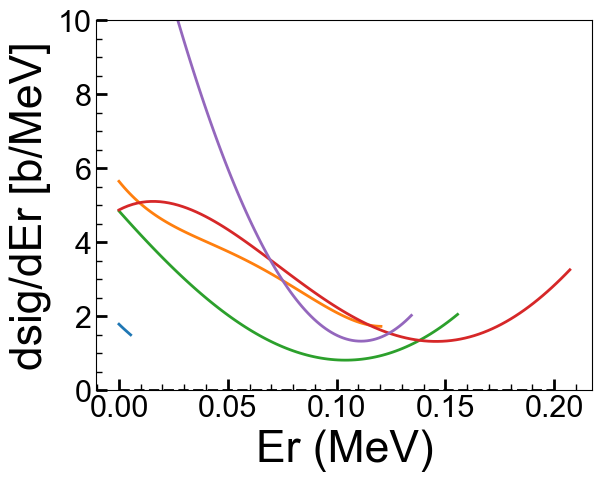

In [46]:
#plot quick
fig = plt.figure()
ax1 = fig.add_subplot(111)
fct = np.flip(ct)
plot(0.04*escale, jac*dsdomegv(ct))
plot(0.896*escale, jac*dsdomeg1v(ct))
plot(1.158*escale, jac*dsdomeg2v(ct))
plot(1.542*escale, jac*dsdomeg3v(ct))
plot(1*escale, jac*dsdomeg4v(ct))
ax1.hlines(0,0,0.2,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(0,10)
xlabel('Er (MeV)')
ylabel('dsig/dEr [b/MeV]')
show()